# Signal Processing

## Import modules

In [1]:
import numpy as np
import pandas as pd

from scipy import signal
from scipy.fftpack import fft

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Generating data

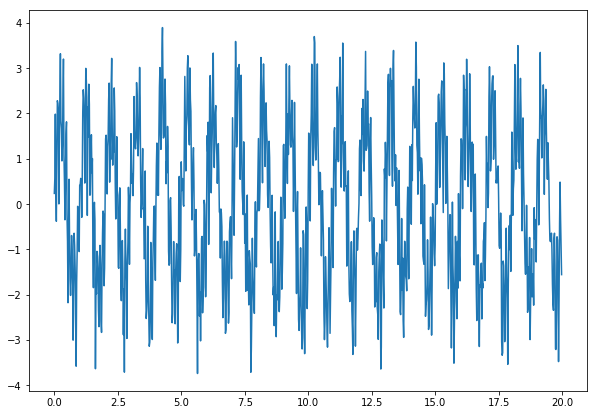

In [2]:
np.random.seed(1234)

noise = 0.5
time_step = 0.02
frq_1 = 1
frq_2 = 9

time_vec = np.arange(0, 20, time_step)
sig = ( 2*np.sin(2*np.pi*frq_1*time_vec) + noise*np.random.randn(time_vec.size)) + 1*(np.sin(2*np.pi*frq_2*time_vec))

plt.figure(figsize=(10,7))
plt.plot(time_vec, sig, label='Original signal')
plt.show()

## Fourier transform

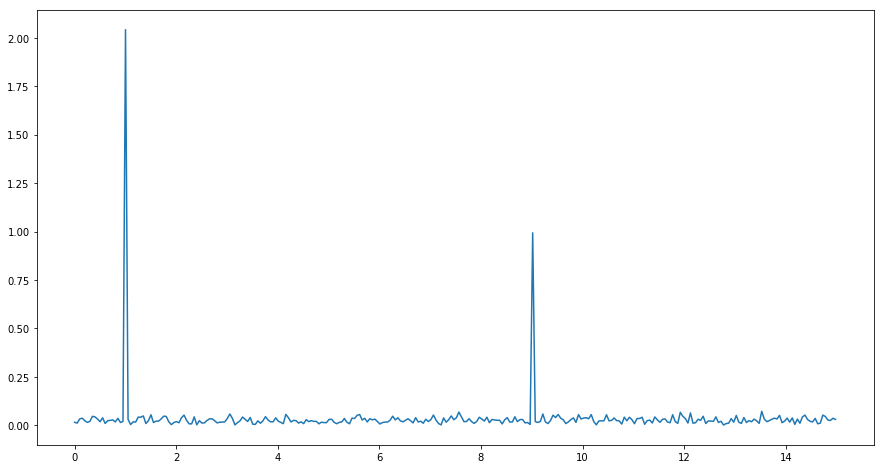

In [3]:
# Number of sample points
N = len(sig)

# sample spacing
T = 20 / N

# create x and y values
x = np.linspace(0.0, N*T, N)
y = sig

# calculate the fourier transform
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

# plot the fourier transform
fig = plt.figure(figsize=(15, 8))
ft = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf[:-200], ft[:-200])
plt.show()

# Fourier Transform with Noise

In [4]:
def f(noise, r = 123):
    
    np.random.seed(r)

    amp = noise
    time_step = 0.02
    period = 1

    time_vec = np.arange(0, 20, time_step)
    sig = (2*np.sin(2 * np.pi / period * time_vec)
           + amp * np.random.randn(time_vec.size)) + 1*(np.sin(2 * np.pi / (period/9) * time_vec))
    
    N = len(sig)
    # sample spacing
    T = 20 / N
    x = np.linspace(0.0, N*T, N)
    y = sig
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


    fig = plt.figure(figsize=(10, 5))
    ft = 2.0/N * np.abs(yf[0:N//2])
    plt.plot(xf[:-200], ft[:-200])
    plt.show()
    
interactive_plot = interactive(f, noise=(0, 2, 0.1), r=(0, 5, 1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=1.0, description='noise', max=2.0), IntSlider(value=5, description='r'…

# Artifacts Arising from the Discrete Nature of Data Storage

In [5]:
def g(w1, w2, tf, window=0):
    
    time_step = 0.02

    time_vec = np.arange(0, tf, time_step)
    if window == 0:
        sig = (2*np.sin(2 * np.pi * w1 * time_vec)+ np.sin(2 * np.pi * w2 * time_vec))
    else:
        sig = np.hanning(len(time_vec))*(2*np.sin(2 * np.pi * w1 * time_vec)+ np.sin(2 * np.pi * w2 * time_vec))
    
    N = len(sig)
    # sample spacing
    T = 20 / N
    x = np.linspace(0.0, N*T, N)
    y = sig
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


    fig = plt.figure(figsize=(10, 5))
    ft = 2.0/N * np.abs(yf[0:N//2])
    plt.plot(xf[:-200], ft[:-200])
    plt.show()
           
interactive_plot = interactive(g, w1=(1, 5, 0.2), w2=(2, 6 , 0.2), tf=(15,20,0.1), window=(0,1,1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=3.0, description='w1', max=5.0, min=1.0, step=0.2), FloatSlider(value=…

## Signal Filtering

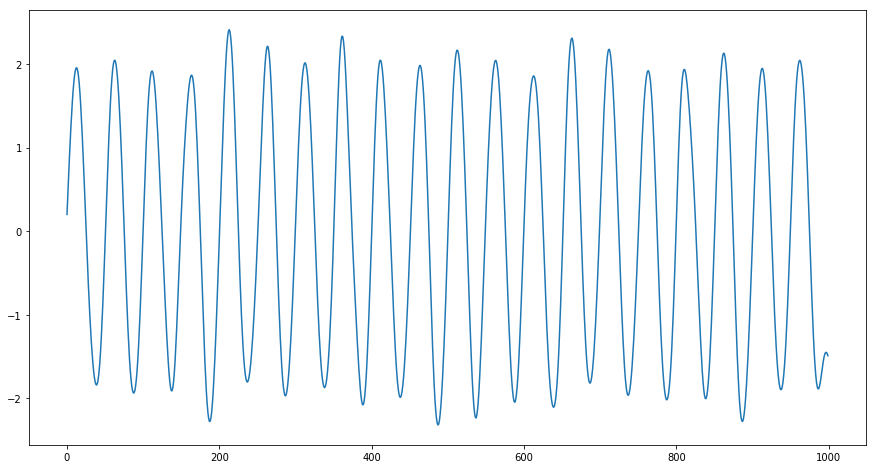

In [6]:
b, a = signal.butter(4, 0.1, 'low')
w, h = signal.freqs(b, a)

fig = plt.figure(figsize=(15, 8))
filtered_sig = signal.filtfilt(b, a, sig)
plt.plot(filtered_sig)
plt.show()

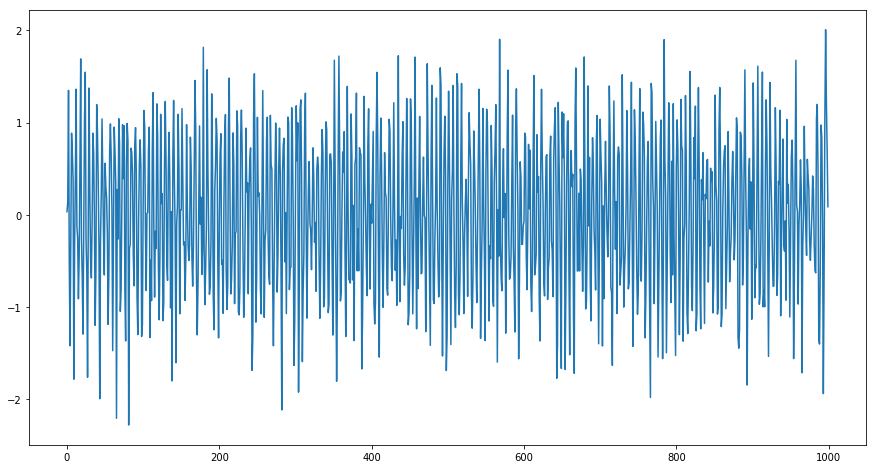

In [7]:
b, a = signal.butter(4, 0.1, 'high')
w, h = signal.freqs(b, a)

fig = plt.figure(figsize=(15, 8))
filtered_sig = signal.filtfilt(b, a, sig)
plt.plot(filtered_sig)
plt.show()

## Signal Smoothing

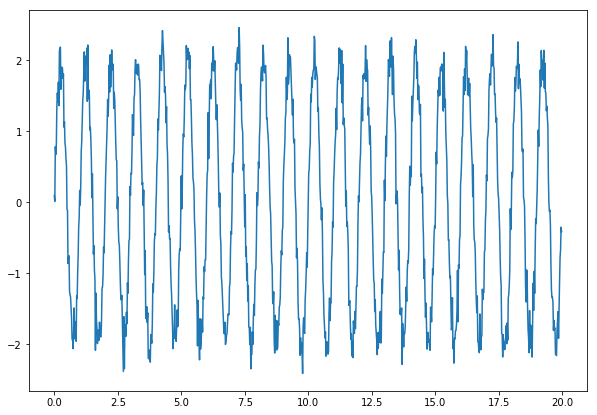

In [8]:
np.random.seed(1234)

noise = 0.2
time_step = 0.02
period = 1

time_vec = np.arange(0, 20, time_step)
sig = (2*np.sin(2 * np.pi / period * time_vec)
       + noise * np.random.randn(time_vec.size))

plt.figure(figsize=(10,7))
plt.plot(time_vec, sig, label='Original signal')
plt.show()


coeffs = wavedec(sig, 'db8', level=3)
amt = 1.8
cA3, cD3, cD2, cD1 = coeffs
A3, D3, D2, D1 = pywt.threshold(cA3, amt, 'hard'), pywt.threshold(cD3, amt, 'hard'), pywt.threshold(cD2, amt, 'hard'), pywt.threshold(cD1, amt, 'hard')
smooth_sig = pywt.waverec([A3, D3, D2, D1], 'db8')

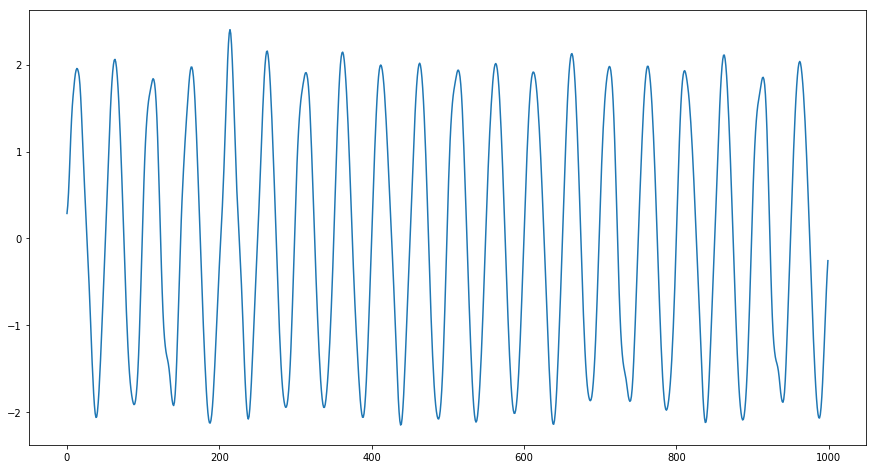

In [9]:
fig = plt.figure(figsize=(15, 8))
filtered_sig = signal.filtfilt(b, a, sig)
plt.plot(smooth_sig)
plt.show()

# Import Data

In [10]:
df_signal_test = pd.DataFrame(pd.read_csv('../data/android_signal/morning_walk.csv')).iloc[:-1000,:]

The following is a table of the raw data

In [11]:
df_signal_test

,time,ax,ay,az,aT
0,0.003,-0.4076,0.0400,-0.4323,0.596
1,0.013,-0.0634,-0.0761,-0.4027,0.415
2,0.033,0.0433,-0.1677,-0.2772,0.327
3,0.052,-0.2302,-0.1723,-0.1037,0.306
4,0.072,-0.2994,-0.1051,-0.0130,0.318
5,0.091,-0.3867,-0.0362,-0.1289,0.409
6,0.110,-0.2939,-0.0875,-0.1837,0.357
7,0.129,-0.2311,-0.0715,-0.1839,0.304
8,0.149,-0.0089,-0.0893,-0.1279,0.156
9,0.168,0.1395,-0.1018,-0.0297,0.175


# Plotting the raw data

### x-axis acceleration

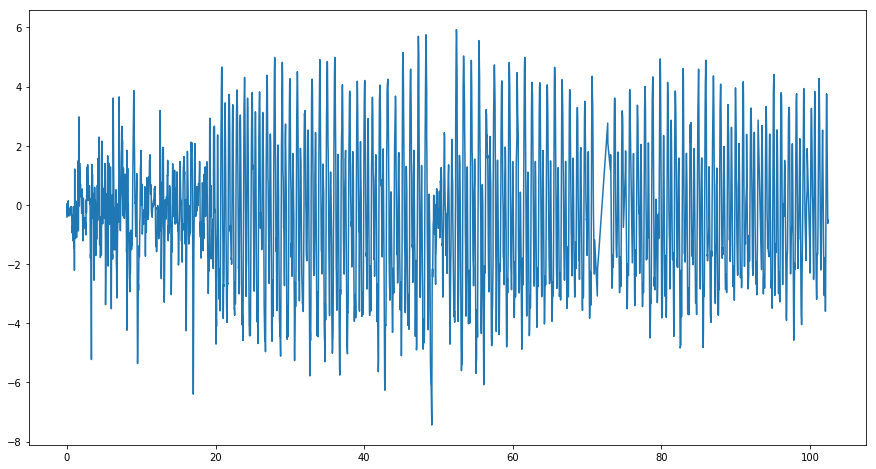

In [12]:
fig = plt.figure(figsize=(15, 8))
plt.plot(df_signal_test.iloc[:,0], df_signal_test.iloc[:,1])
plt.show()

### y-axis acceleration

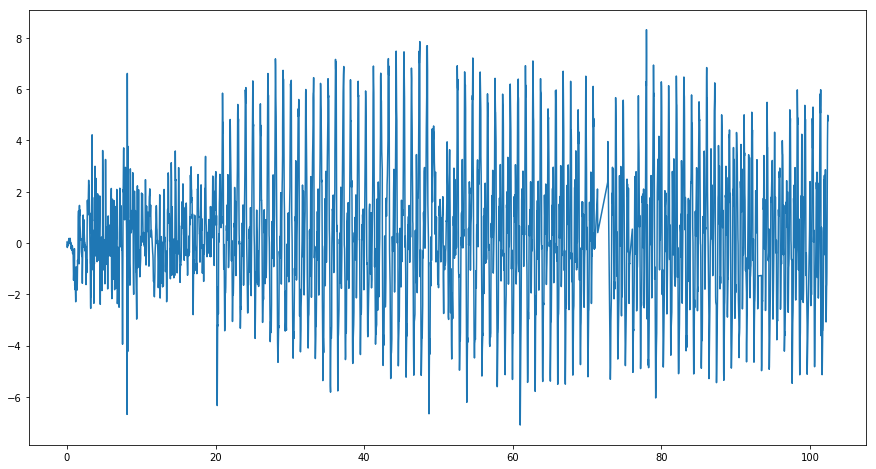

In [13]:
fig = plt.figure(figsize=(15, 8))
plt.plot(df_signal_test.iloc[:,0], df_signal_test.iloc[:,2])
plt.show()

### z-axis acceleration

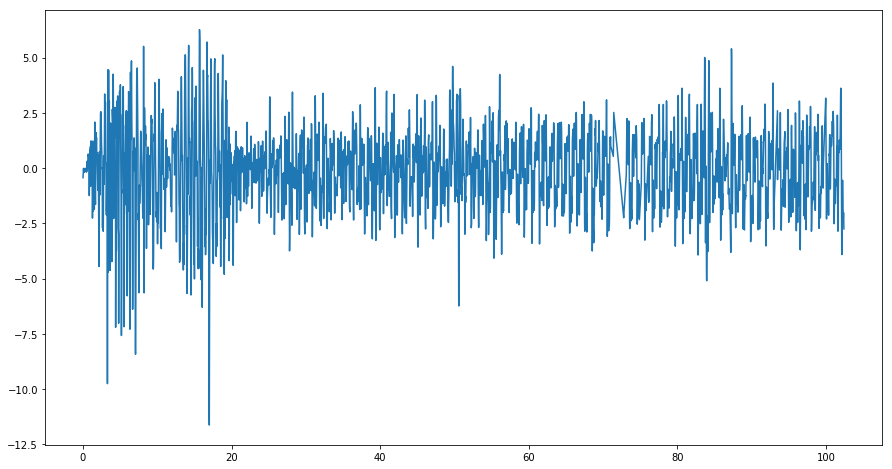

In [14]:
fig = plt.figure(figsize=(15, 8))
plt.plot(df_signal_test.iloc[:,0], df_signal_test.iloc[:,3])
plt.show()

# The Fourier Transform

### x-axis

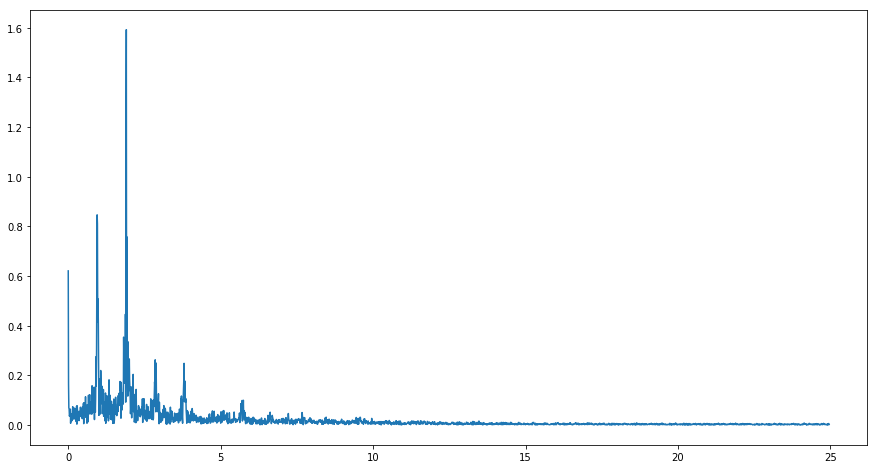

In [15]:
# Number of sample points
N = len(df_signal_test)
# sample spacing
T = 102.432 / N
x = np.linspace(0.0, N*T, N)
y = df_signal_test.iloc[:,1]
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


fig = plt.figure(figsize=(15, 8))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show()

### y-axsis

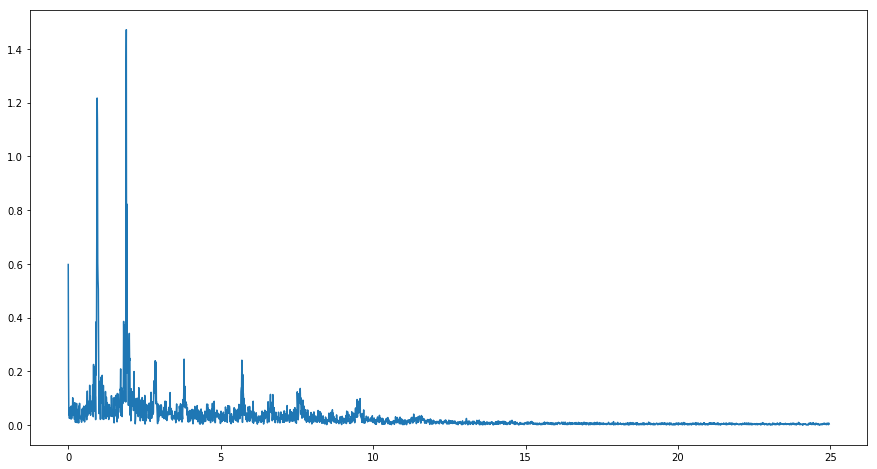

In [16]:
# Number of sample points
N = len(df_signal_test)
# sample spacing
T = 102.432 / N
x = np.linspace(0.0, N*T, N)
y = df_signal_test.iloc[:,2]
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


fig = plt.figure(figsize=(15, 8))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show()

### z-axis

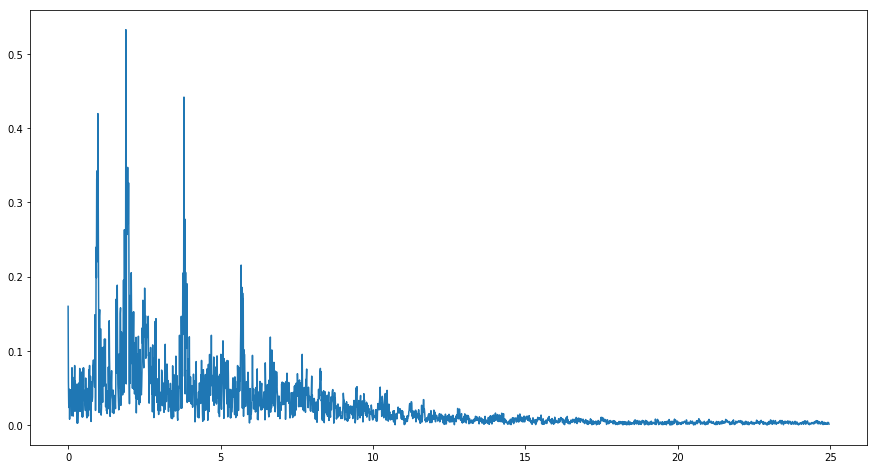

In [17]:
# Number of sample points
N = len(df_signal_test)
# sample spacing
T = 102.432 / N
x = np.linspace(0.0, N*T, N)
y = df_signal_test.iloc[:,3]
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)


fig = plt.figure(figsize=(15, 8))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show()

# Data Features for Classification

We will set up a simple classification model based off the $L^2$ norm of the signal magnitude in the z direction over a 1 second window.  We will try to distiguish walking from walking up stairs.

In [18]:
def create_example(Data):
    n,m = Data.shape
    X = []
    for i in range(int(n/50)):
        X.append([sum(np.abs(Data.iloc[i*50:(i+1)*50, 1])), sum(np.abs(Data.iloc[i*50:(i+1)*50, 2])), sum(np.abs(Data.iloc[i*50:(i+1)*50, 3]))])
    return X

In [19]:
df_signal_walk = pd.DataFrame(pd.read_csv('../data/android_signal/walking.csv'))
df_signal_stairs = pd.DataFrame(pd.read_csv('../data/android_signal/stairs_2.csv'))

In [20]:
X = create_example(df_signal_walk)+create_example(df_signal_stairs)

In [21]:
Y = np.array([1 for i in range(155)]+[0 for i in range(27)])

# Building the model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

logisticRegr = LogisticRegression()

logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
predictions = logisticRegr.predict(x_test)

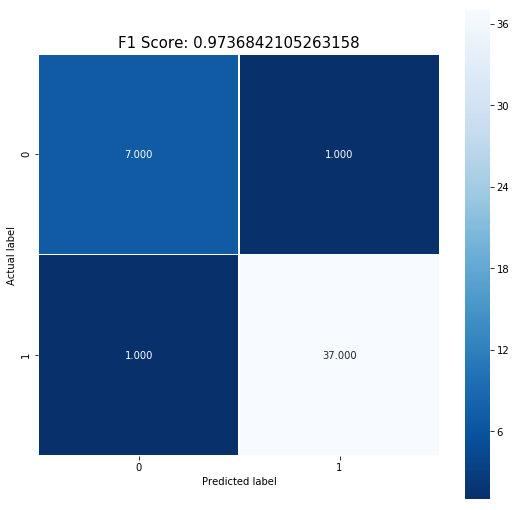

In [25]:
cm = metrics.confusion_matrix(y_test, predictions)
score = metrics.f1_score(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'F1 Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);